In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import r2_score
from sklearn.metrics import d2_tweedie_score
from sklearn.metrics import explained_variance_score

In [2]:
data = pd.read_csv('Dataset\weatherHistory.csv')
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [3]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Formatted Date'] = data['Formatted Date'].dt.date
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['dayofyear'] = data['Formatted Date'].dt.dayofyear
data['year'] = data['Formatted Date'].dt.year
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,dayofyear,year
0,2006-03-31 00:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90,2006
1,2006-03-31 00:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91,2006
3,2006-04-01 00:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91,2006
4,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,253,2016
96449,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,253,2016
96450,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,253,2016
96451,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,253,2016


In [4]:
df_mean = data.groupby(['dayofyear','year'])['Temperature (C)'].mean().reset_index()
df_mean

,dayofyear,year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407
...,...,...,...
4014,365,2015,-4.304861
4015,365,2016,0.117593
4016,366,2008,-6.218056
4017,366,2012,-3.249306


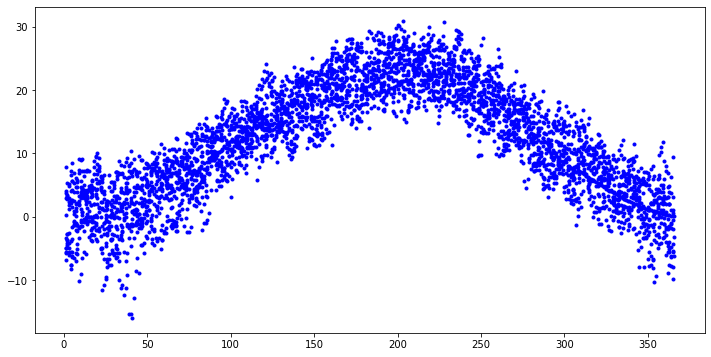

In [5]:
plt.figure(figsize=(12,6))
plt.scatter(df_mean['dayofyear'],df_mean['Temperature (C)'],marker='.',color='blue')

In [6]:
X = df_mean['dayofyear'].values
Y = df_mean['Temperature (C)'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)



In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3014, 1)
(3014, 1)
(1005, 1)
(1005, 1)


In [8]:
class Perceptron:
    def __init__(self,learning_rate,input_length,epochs):
        self.lr = learning_rate
        self.w = np.random.rand(input_length)
        self.b = np.random.rand(1)
        self.epochs = epochs

    def activation(self,x,function='relu'):
        if function == 'sigmoid':
            return 1/(1+np.exp(-x))
        elif function == 'relu':
            return np.maximum(0,x)
        elif function == 'tanh':
            return np.tanh(x)
        elif function == 'linear':
            return x
        else:
            return Exception('Unknown activation function')        


    def fit(self,X_train,Y_train,X_test,Y_test):
        losses = []
        accuracies= []
        losses_test = []
        accuracies_test = []
        fig,(ax1) = plt.subplots(1,1,figsize=(12,6))

        for epoch in tqdm(range(self.epochs)):
            for x,y in zip(X_train,Y_train):
                # forwarding
                y_pred = x @ self.w+ self.b
                y_pred = self.activation(y_pred,'tanh')

                #back propagation
                error = y -y_pred

                # update
                self.w = self.w + x * error * self.lr
                self.b = self.b + error * self.lr
            loss_train,accuracy_train = self.evaluate(X_train,Y_train)
            loss_test,accuracy_test = self.evaluate(X_test,Y_test)

            losses.append(loss_train)
            accuracies.append(accuracy_train)
            losses_test.append(loss_test)
            accuracies_test.append(accuracy_test)

            ax1.clear()
            ax1.scatter(X_train,Y_train,c='blue',marker='.',label='data')
            ax1.plot(X_train,y_pred,c='red',label='fitted line')
            ax1.set(xlabel='Day Of Year', ylabel='Temperature (C)')
            plt.legend()


        return losses,accuracies,losses_test,accuracies_test


    def predict(self,X_test,Y_test):
        Y_pred = []
     
        for x_test in X_test:
            y_pred = x_test @ self.w + self.b
            y_pred = self.activation(y_pred)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

    def calculate_loss(self,X_test,Y_test,metric='mae'):
        Y_pred = self.predict(X_test,Y_test)
        if metric == "mae" :
            return np.sum(np.abs(Y_test - Y_pred))
        elif metric == "mse":
            return np.sum((Y_test - Y_pred) ** 2)
        elif metric == "rmse" :
            return np.sqrt(np.sum((Y_test - Y_pred) ** 2))
        
        else:
            return Exception('Unknown metric')  
        
        
    def calculate_accuracy(self,X_test,Y_test):
        Y_pred = self.predict(X_test,Y_test)

        accuracy = r2_score(Y_test,Y_pred)
      
        return accuracy
    
    def evaluate(self,X_test,Y_test):
        loss = self.calculate_loss(X_test,Y_test)
        accuracy = self.calculate_accuracy(X_test,Y_test)

        return loss,accuracy

In [9]:

model = Perceptron(learning_rate=0.0001,input_length=X_train.shape[1],epochs=128)
loss_train,accuracy_train,loss_test,accuracy_test = model.fit(X_train,Y_train,X_test,Y_test)

100%|██████████| 128/128 [00:10<00:00, 12.57it/s]


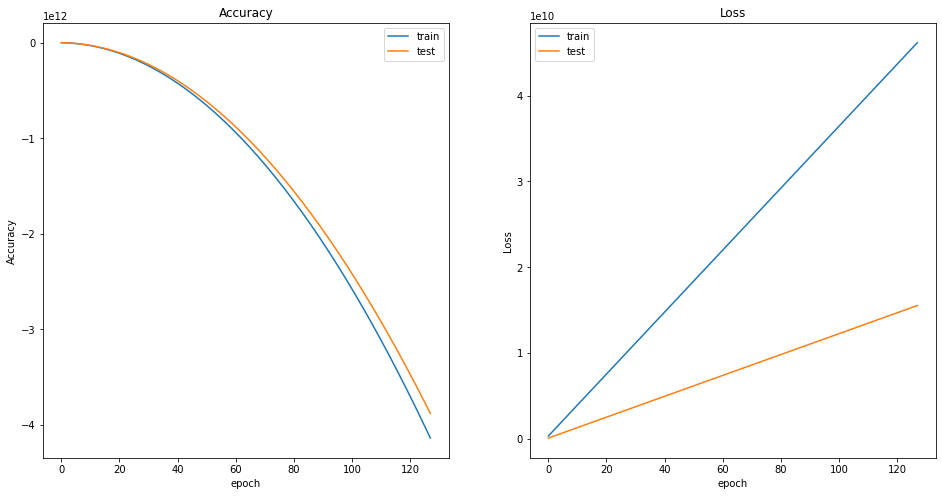

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))


ax1.plot(accuracy_train)
ax1.plot(accuracy_test)
ax1.set_title("Accuracy")
ax1.set_xlabel("epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(['train','test'])

ax2.plot(loss_train)
ax2.plot(loss_test)
ax2.set_title("Loss")
ax2.set_xlabel("epoch")
ax2.set_ylabel("Loss")
ax2.legend(['train','test'])


plt.show()

In [25]:
Y_pred = model.predict(X,Y)
Y_pred.shape

(4019, 1)

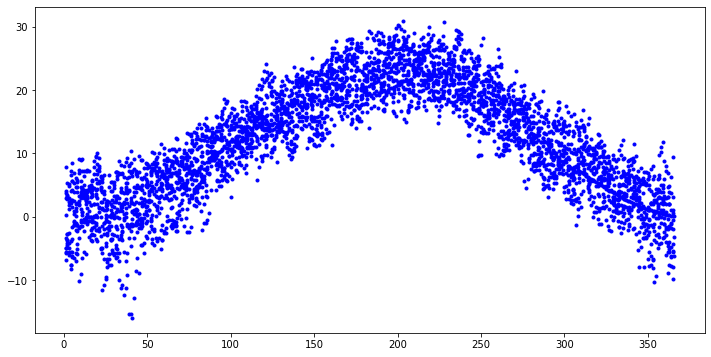

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(df_mean['dayofyear'],df_mean['Temperature (C)'],marker='.',color='blue')
ax1.plot(X,Y_pred,c='red',label='fitted line')
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,Y_train)

In [28]:
Y_pr = reg.predict(X_test)
